In [36]:
import numpy as np
import matplotlib.pyplot as plt
from MIME_correction import get_inferred_Kds
from MIME_simulator import infer_effects

In [37]:
path = "/datadisk/MIME/wiep_sim/no_error/secondFromProt1/prot1"

In [38]:
ground_truth = np.loadtxt(path + "/single_kds.txt")
ground_truth.shape

(75,)

In [30]:
mime_results = get_inferred_Kds(path + "/results/PositionWiseKdEstimates.csv")
mime_results.shape

(75,)

In [39]:
#skip header row and don't use first column
counts_unbound = np.loadtxt(path + "/1d/8.txt", delimiter="\t", skiprows=1, usecols=range(1, 5)).T
counts_bound = np.loadtxt(path + "/1d/7.txt", delimiter="\t", skiprows=1, usecols=range(1, 5)).T
print(counts_unbound)
print(counts_bound)


[[3487406. 3438212. 3515123. 3514530. 3637305. 3743972. 3527359. 3511191.
  3558182. 3551309. 3472455. 3388790. 3510091. 3454105. 3415360. 3321762.
  3486817. 3472123. 3355761. 3335108. 3388556. 3430170. 3404735. 3473517.
  3569674.]
 [ 148018.  185279.  107915.  158673.   53427.   77252.  139235.  139480.
   142165.  201798.  157795.  130990.  184813.  132255.  146785.  175362.
   189975.  197312.  174878.  283079.  190126.  118391.  205925.  192202.
    64303.]
 [ 231796.  205017.  234701.  168159.  112368.  121317.  166363.  137670.
   192903.  157928.  158130.  254206.  214110.  175675.  178936.  242066.
   224236.   98566.  236707.  190460.  202088.  254728.  131070.  151040.
   226292.]
 [ 129812.  168524.  139293.  155670.  193932.   54491.  164075.  208691.
   103782.   85997.  208652.  223046.   88018.  234997.  255951.  257842.
    96004.  229031.  229686.  188385.  216262.  193743.  255302.  180273.
   136763.]]
[[1732047. 1705172. 1692197. 1708774. 1678652. 1713989. 1826862

In [40]:
inferred_effects = infer_effects(counts_bound, counts_unbound)
inferred_effects = inferred_effects[1:].flatten('F')
inferred_effects.shape

(75,)

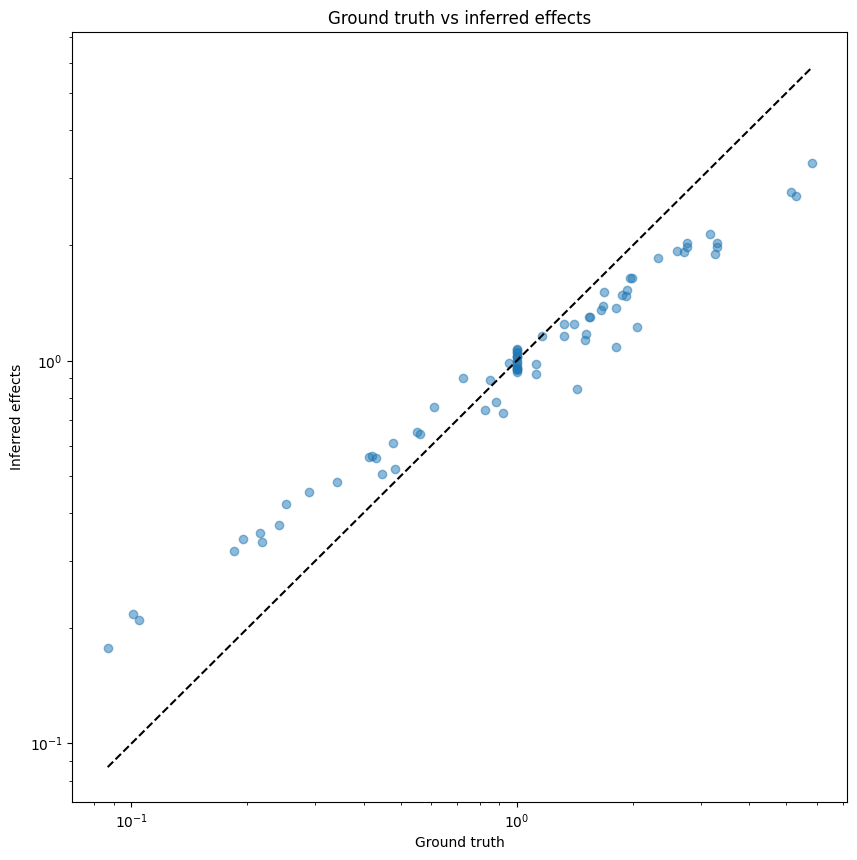

In [46]:
#set up single plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#plot ground truth vs inferred effects
ax.scatter(ground_truth, inferred_effects, alpha=0.5)
ax.plot([np.min(ground_truth), np.max(ground_truth)], [np.min(ground_truth), np.max(ground_truth)], color='black', linestyle='--')
ax.set_xlabel("Ground truth")
ax.set_ylabel("Inferred effects")
ax.set_title("Ground truth vs inferred effects")
# log scale for better visualization
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

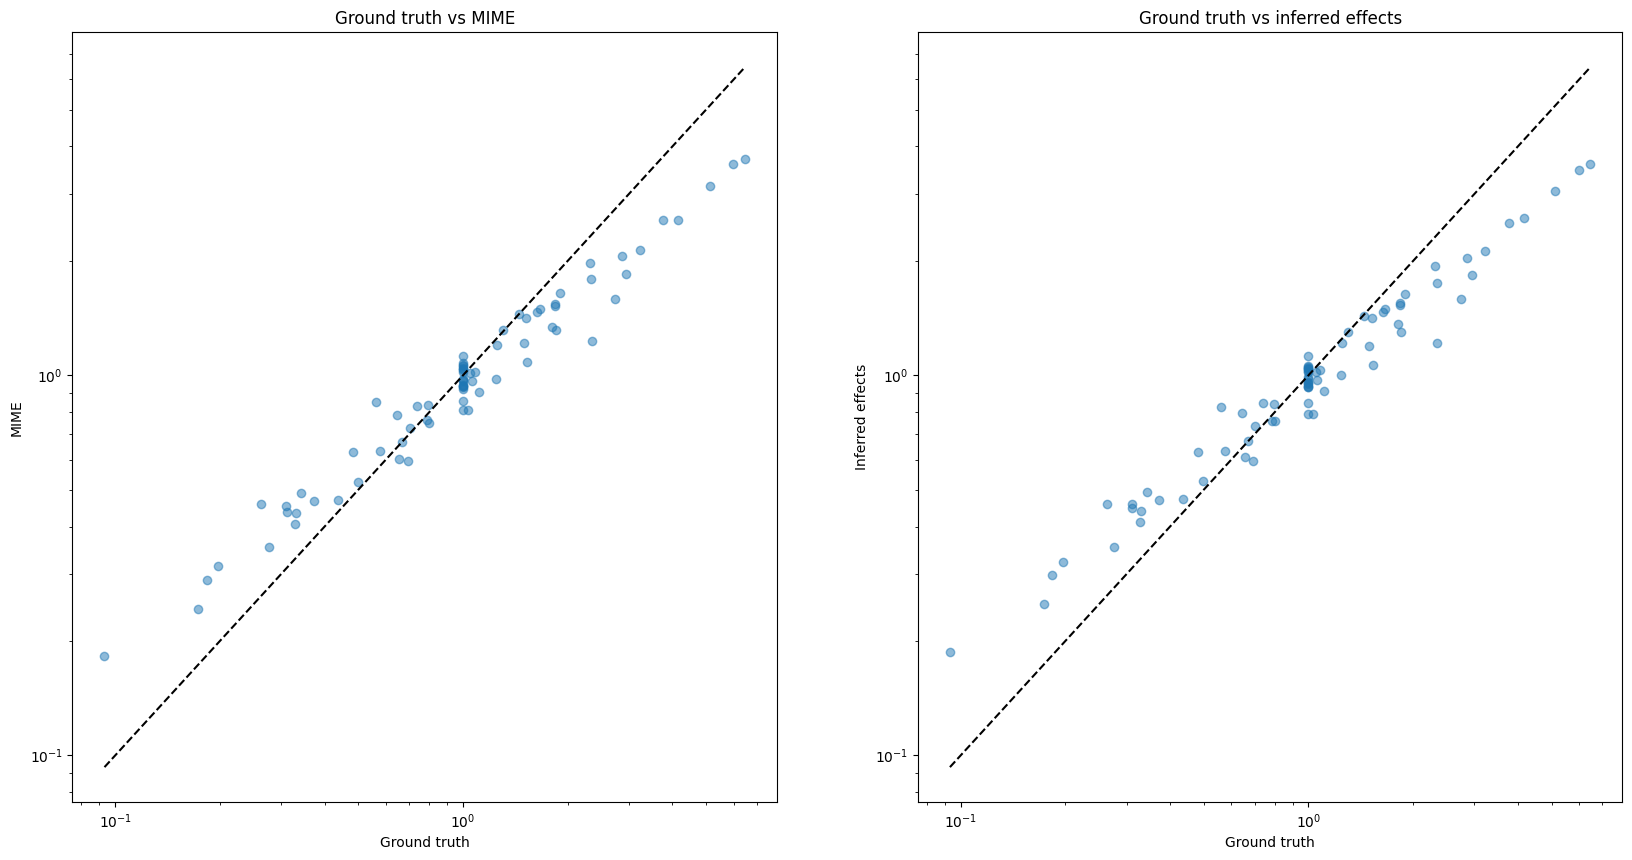

In [35]:
#set up 2 subplots
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

#plot ground truth vs MIME results
ax1.scatter(ground_truth, mime_results, alpha=0.5)
ax1.plot([np.min(ground_truth), np.max(ground_truth)], [np.min(ground_truth), np.max(ground_truth)], color='black', linestyle='--')
ax1.set_xlabel("Ground truth")
ax1.set_ylabel("MIME")
ax1.set_title("Ground truth vs MIME")
# log scale for better visualization
ax1.set_xscale('log')
ax1.set_yscale('log')

#plot ground truth vs inferred effects
ax2.scatter(ground_truth, inferred_effects, alpha=0.5)
ax2.plot([np.min(ground_truth), np.max(ground_truth)], [np.min(ground_truth), np.max(ground_truth)], color='black', linestyle='--')
ax2.set_xlabel("Ground truth")
ax2.set_ylabel("Inferred effects")
ax2.set_title("Ground truth vs inferred effects")
# log scale for better visualization
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.show()